# Trabajo en Clase: Resolución de Árboles de Expresión Aritmética

**Realizado por:** Joaquín Bermeo

Este trabajo tiene como objetivo aplicar los conocimientos sobre árboles binarios de expresión en Python, utilizando clases, recursividad y visualización con `networkx` y `matplotlib`.

## Instrucciones Generales:
1. Resuelve los **5 ejercicios** propuestos a continuación.
2. Para cada ejercicio:
   - Construye el árbol binario de expresión.
   - Implementa el árbol con clases (`Nodo`, `evaluar()`...).
   - Visualiza el árbol con `networkx`.
   - Evalúa la expresión y muestra el resultado.
3. Documenta y comenta tu código.


## Ejercicio 1
**Expresión a resolver:** `(7 + 2) * (5 - 3)`

### a. Construcción del Árbol

In [646]:
# Importamos las librerías necesarias para graficar y construir grafos dirigidos
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un grafo dirigido (DiGraph) para representar el árbol de expresión
G = nx.DiGraph()

# Definimos las aristas del árbol en forma de tuplas (padre, hijo)
edges = [
    ('*','+'),    # El nodo raíz '*' tiene como hijo izquierdo al nodo '+'
    ('*','-'),    # y como hijo derecho al nodo '-'
    ('+','7'),    # '+' tiene como hijos a '7' y '2'
    ('+','2'),
    ('-','5'),    # '-' tiene como hijos a '5' y '3'
    ('-','3'),
]

# Añadimos todas las aristas al grafo
G.add_edges_from(edges)

# Definimos las posiciones manualmente para que el árbol tenga una forma jerárquica
pos = {
    '*': (0, 2),     # Nodo raíz
    '+': (-1.5, 1),  # Hijo izquierdo del '*'
    '-': (1.5, 1),   # Hijo derecho del '*'
    '7': (-2, 0),    # Hijo izquierdo del '+'
    '2': (-1, 0),    # Hijo derecho del '+'
    '5': (1, 0),     # Hijo izquierdo del '-'
    '3': (2, 0)      # Hijo derecho del '-'
}


### b. Visualización con `networkx`

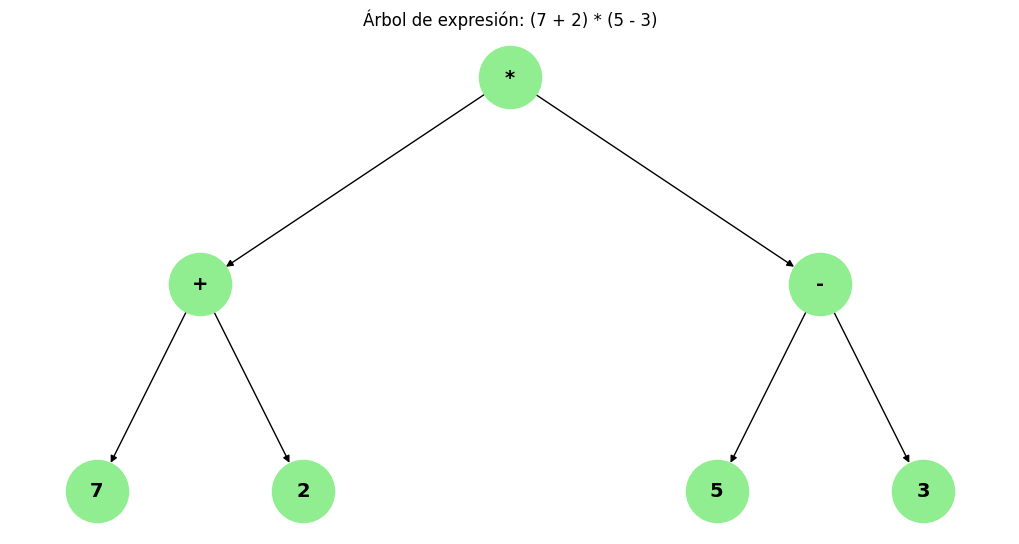

In [647]:
# Creamos una figura con un tamaño específico
plt.figure(figsize=(10, 5))

# Dibujamos el grafo con las posiciones previamente definidas
nx.draw(
    G, pos,
    with_labels=True,          # Mostrar etiquetas en los nodos
    node_color='lightgreen',   # Color de los nodos
    node_size=2000,            # Tamaño de los nodos
    font_size=14,              # Tamaño de la fuente
    font_weight='bold',        # Peso de la fuente (negrita)
    arrows=True                # Mostrar flechas para indicar dirección
)

# Título del gráfico
plt.title("Árbol de expresión: (7 + 2) * (5 - 3)")

# Ocultamos los ejes para una visualización más limpia
plt.axis('off')

# Mostramos el árbol graficado
plt.show()

### c. Evaluación de la Expresión

In [648]:
# Clase que representa un nodo del árbol binario
class Nodo:
    def __init__(self, valor):
        self.valor = valor      # Puede ser un operador o un número
        self.izq = None         # Hijo izquierdo
        self.der = None         # Hijo derecho

# Función para construir manualmente el árbol binario de expresión
def construir_arbol():
    raiz = Nodo('*')                   # Nodo raíz con operador '*'
    raiz.izq = Nodo('+')               # Subárbol izquierdo con operador '+'
    raiz.der = Nodo('-')               # Subárbol derecho con operador '-'
    raiz.izq.izq = Nodo(7)             # Hijo izquierdo de '+'
    raiz.izq.der = Nodo(2)             # Hijo derecho de '+'
    raiz.der.izq = Nodo(5)             # Hijo izquierdo de '-'
    raiz.der.der = Nodo(3)             # Hijo derecho de '-'
    return raiz

# Función recursiva para evaluar el árbol de expresión
def evaluar(nodo):
    if isinstance(nodo.valor, int):    # Si el nodo es un número, lo retornamos
        return nodo.valor
    izq = evaluar(nodo.izq)            # Evaluamos recursivamente el subárbol izquierdo
    der = evaluar(nodo.der)            # Evaluamos recursivamente el subárbol derecho
    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Construimos el árbol y evaluamos su resultado
arbol = construir_arbol()
resultado = evaluar(arbol)
print(resultado)  # Imprime el resultado de la expresión: (7 + 2) * (5 - 3) = 18


18


## Ejercicio 2
**Expresión a resolver:** `((6 / 2) + (1 + 1)) * (4 - 2)`

### a. Construcción del Árbol

In [649]:
# Importamos las bibliotecas necesarias para graficar y crear grafos dirigidos
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un grafo dirigido para representar el árbol
G = nx.DiGraph()

# Definimos las aristas del árbol usando identificadores únicos para nodos repetidos
edges = [
    ('*', '+1'),        # '*' es la raíz y tiene como hijo izquierdo a '+1'
    ('*', '-'),         # '*' tiene como hijo derecho a '-'
    ('+1', '/'),        # '+1' tiene como hijos '/' y '+2'
    ('+1', '+2'),
    ('/', '6'),         # '/' divide 6 entre 2a
    ('/', '2a'),
    ('+2', '1a'),       # '+2' suma 1a + 1b
    ('+2', '1b'),
    ('-', '4'),         # '-' resta 4 - 2b
    ('-', '2b'),
]

# Agregamos las aristas al grafo
G.add_edges_from(edges)

# Definimos manualmente las posiciones de cada nodo para graficar el árbol jerárquicamente
pos = {
    '*': (0, 2),     
    '+1': (-1.5, 1),
    '-': (1.5, 1),   
    '/': (-2, 0),     
    '+2': (-1, 0),     
    '6': (-2.3, -1),      
    '2a': (-1.8, -1),       
    '1a': (-1.2, -1),       
    '1b': (-0.7, -1),       
    '4': (1, 0),       
    '2b': (2, 0),       
}

# Definimos etiquetas personalizadas para que el grafo muestre los valores reales
labels = {
    '*': '*',
    '+1': '+',
    '+2': '+',
    '-': '-',
    '/': '/',
    '6': '6',
    '2a': '2',
    '1a': '1',
    '1b': '1',
    '4': '4',
    '2b': '2',
}

### b. Visualización con `networkx`

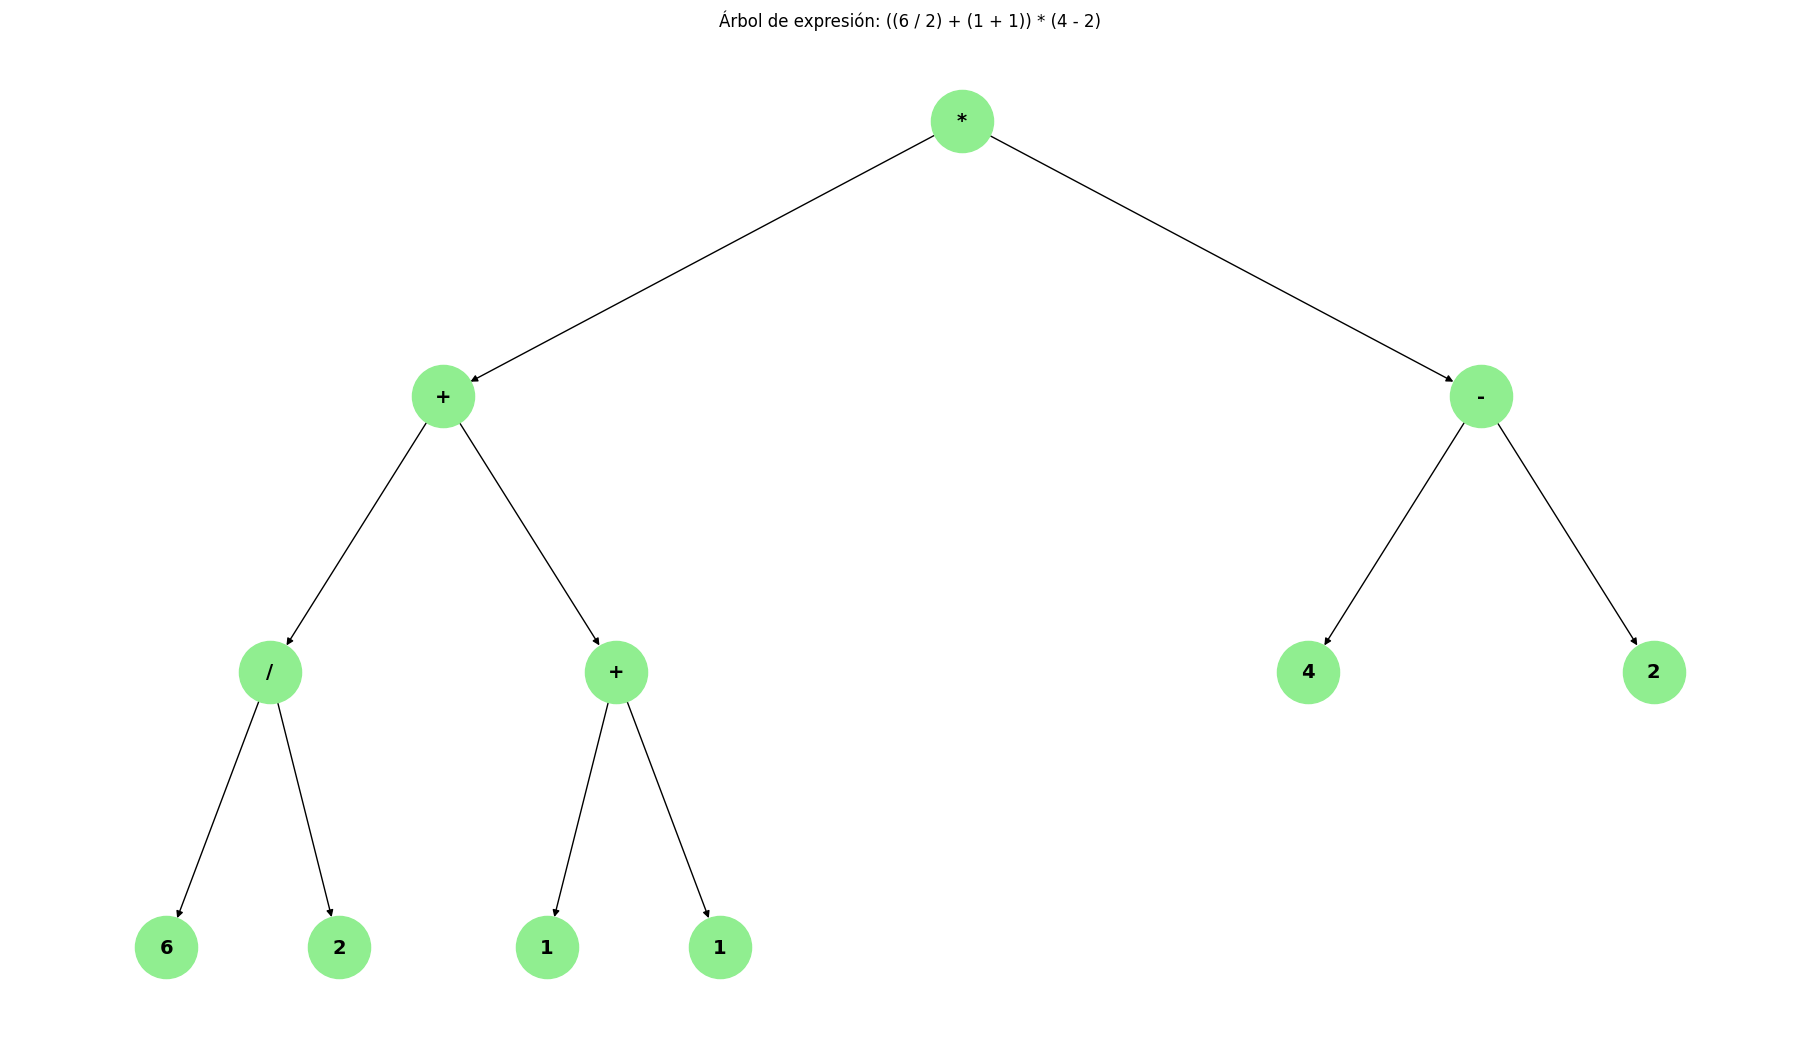

In [650]:
# Creamos una figura con un tamaño adecuado para mostrar el árbol completo
plt.figure(figsize=(18, 10))

# Dibujamos el grafo usando posiciones y etiquetas personalizadas
nx.draw(
    G, pos,
    with_labels=True,         # Mostrar etiquetas dentro de los nodos
    labels=labels,            # Usar las etiquetas reales definidas
    node_color='lightgreen',  # Color de los nodos
    node_size=2000,           # Tamaño de los nodos
    font_size=14,             # Tamaño de letra
    font_weight='bold',       # Letra en negrita
    arrows=True               # Mostrar flechas para indicar dirección
)

# Título del gráfico que representa la expresión aritmética
plt.title("Árbol de expresión: ((6 / 2) + (1 + 1)) * (4 - 2)")

# Ocultamos los ejes para una visualización más limpia
plt.axis('off')

# Mostramos el árbol graficado
plt.show()

### c. Evaluación de la Expresión

In [651]:
# Clase para representar nodos del árbol binario
class Nodo:
    def __init__(self, valor):
        self.valor = valor    # El valor puede ser un número o un operador
        self.izq = None       # Hijo izquierdo
        self.der = None       # Hijo derecho

# Función para construir manualmente el árbol de expresión
def construir_arbol():
    raiz = Nodo('*')                    # Nodo raíz con operador '*'
    raiz.izq = Nodo('+')                # Hijo izquierdo: '+'
    raiz.der = Nodo('-')                # Hijo derecho: '-'
    
    raiz.izq.izq = Nodo('/')            # Subárbol izquierdo de '+': '/'
    raiz.izq.der = Nodo('+')            # Subárbol derecho de '+': otro '+'
    
    raiz.izq.izq.izq = Nodo(6)          # '/' hijo izquierdo: 6
    raiz.izq.izq.der = Nodo(2)          # '/' hijo derecho: 2

    raiz.izq.der.izq = Nodo(1)          # '+' hijo izquierdo: 1
    raiz.izq.der.der = Nodo(1)          # '+' hijo derecho: 1

    raiz.der.izq = Nodo(4)              # '-' hijo izquierdo: 4
    raiz.der.der = Nodo(2)              # '-' hijo derecho: 2

    return raiz

# Función recursiva para evaluar el árbol de expresión
def evaluar(nodo):
    if isinstance(nodo.valor, int):     # Si el nodo es un número, lo devolvemos
        return nodo.valor
    izq = evaluar(nodo.izq)             # Evaluamos recursivamente el hijo izquierdo
    der = evaluar(nodo.der)             # Evaluamos recursivamente el hijo derecho
    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Construimos el árbol de expresión y lo evaluamos
arbol = construir_arbol()
resultado = evaluar(arbol)
print(resultado)  # Muestra: ((6 / 2) + (1 + 1)) * (4 - 2) = (3 + 2) * 2 = 10



10.0


## Ejercicio 3
**Expresión a resolver:** `9 - ((3 * 2) + (8 / 4))`

### a. Construcción del Árbol

In [652]:
# Importamos las bibliotecas necesarias para graficar el árbol
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un grafo dirigido para representar el árbol de expresión
G = nx.DiGraph()

# Definimos las conexiones (aristas) entre los nodos
# Representan la jerarquía de operaciones en la expresión
edges = [
    ('-', '9'),      # '-' tiene como hijo izquierdo a '9'
    ('-', '+'),      # '-' tiene como hijo derecho a '+'
    ('+', '*'),      # '+' tiene como hijo izquierdo a '*'
    ('+', '/'),      # '+' tiene como hijo derecho a '/'
    ('*', '3'),      # '*' multiplica 3 por 2
    ('*', '2'),
    ('/', '8'),      # '/' divide 8 entre 4
    ('/', '4'),
]

# Agregamos las aristas al grafo
G.add_edges_from(edges)

# Posicionamos manualmente cada nodo para graficar el árbol de forma jerárquica
pos = {
    '-': (0, 2),      # Nodo raíz (nivel superior)
    '9': (-1.5, 1),   # Hijo izquierdo de '-'
    '+': (1.5, 1),    # Hijo derecho de '-'
    '*': (1, 0),      # Hijo izquierdo de '+'
    '/': (2, 0),      # Hijo derecho de '+'
    '3': (0.8, -1),   # Hijos de '*'
    '2': (1.2, -1),
    '8': (1.8, -1),   # Hijos de '/'
    '4': (2.2, -1),
}


### b. Visualización con `networkx`

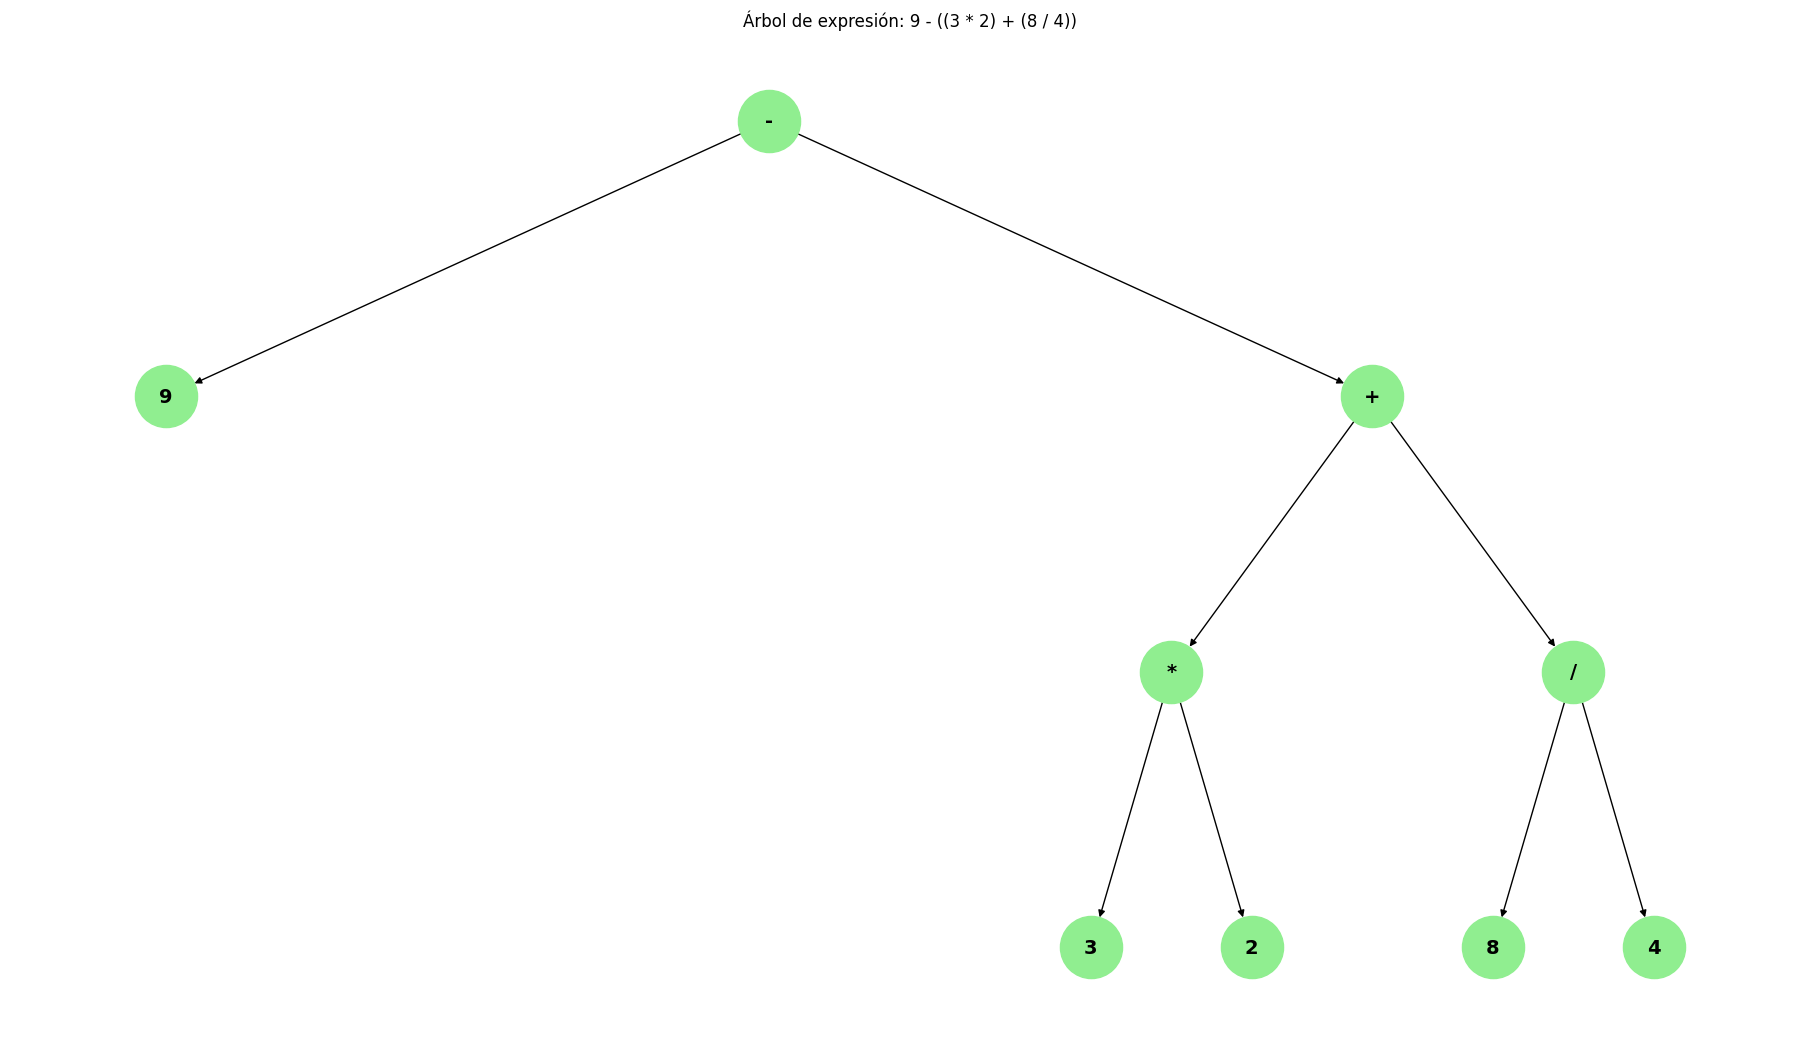

In [653]:
# Creamos una figura de gran tamaño para visualizar claramente el árbol
plt.figure(figsize=(18, 10))

# Dibujamos el grafo con los parámetros de estilo deseados
nx.draw(
    G, pos,                   # Grafo y posiciones de nodos
    with_labels=True,        # Mostrar etiquetas dentro de los nodos
    node_color='lightgreen', # Color de fondo de los nodos
    node_size=2000,          # Tamaño de los nodos
    font_size=14,            # Tamaño de letra
    font_weight='bold',      # Letra en negrita
    arrows=True              # Mostrar flechas que indican dirección
)

# Título que describe la expresión representada
plt.title("Árbol de expresión: 9 - ((3 * 2) + (8 / 4))")

# Ocultamos los ejes del gráfico
plt.axis('off')

# Mostramos el gráfico del árbol
plt.show()

### c. Evaluación de la Expresión

In [654]:
# Clase que representa cada nodo del árbol binario
class Nodo:
    def __init__(self, valor):
        self.valor = valor    # Puede ser un número o un operador
        self.izq = None       # Subárbol izquierdo
        self.der = None       # Subárbol derecho

# Función para construir manualmente el árbol binario de expresión
def construir_arbol():
    raiz = Nodo('-')                      # Nodo raíz: resta
    raiz.izq = Nodo(9)                    # Hijo izquierdo: número 9
    raiz.der = Nodo('+')                  # Hijo derecho: suma

    raiz.der.izq = Nodo('*')              # Suma: hijo izquierdo es multiplicación
    raiz.der.der = Nodo('/')              # Suma: hijo derecho es división

    raiz.der.izq.izq = Nodo(3)            # Multiplicación: 3 * 2
    raiz.der.izq.der = Nodo(2)

    raiz.der.der.izq = Nodo(8)            # División: 8 / 4
    raiz.der.der.der = Nodo(4)

    return raiz

# Función recursiva para evaluar el árbol de expresión
def evaluar(nodo):
    if isinstance(nodo.valor, int):       # Si es número, se devuelve directamente
        return nodo.valor
    izq = evaluar(nodo.izq)               # Evaluar recursivamente hijo izquierdo
    der = evaluar(nodo.der)               # Evaluar recursivamente hijo derecho
    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Construcción del árbol y evaluación de la expresión
arbol = construir_arbol()
resultado = evaluar(arbol)
print(resultado)  # Resultado: 9 - ((3*2) + (8/4)) = 9 - (6 + 2) = 1


1.0


## Ejercicio 4
**Expresión a resolver:** `((10 - 2) * (6 + 1)) / (8 - (3 + 1))`

### a. Construcción del Árbol

In [655]:
# Importamos librerías para graficar el árbol
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un grafo dirigido para representar el árbol de expresión
G = nx.DiGraph()

# Definimos las conexiones entre nodos (aristas), cada operador conecta con sus operandos
edges = [
    ('/', '*'),        # Raíz '/' conecta con multiplicación y resta
    ('/', '-.1'),

    ('*', '-.2'),      # Multiplicación conecta con (10 - 2) y (6 + 1)
    ('*', '+.1'),

    ('-.2', '10'),     # Subárbol izquierdo: 10 - 2
    ('-.2', '2'),
    ('+.1', '6'),      # Subárbol derecho: 6 + 1
    ('+.1', '1.a'),

    ('-.1', '8'),      # Parte derecha de la división: 8 - (3 + 1)
    ('-.1', '+.2'),
    ('+.2', '3'),      # Subárbol: 3 + 1
    ('+.2', '1.b'),
]

# Añadimos las conexiones al grafo
G.add_edges_from(edges)

# Posiciones para visualizar el árbol ordenadamente
pos = {
    '/': (0, 2),           # Nodo raíz (nivel superior)
    '*': (-1.5, 1),        # Hijo izquierdo de '/'
    '-.1': (1.5, 1),       # Hijo derecho de '/'

    '-.2': (-2, 0),        # Hijo izquierdo de '*'
    '+.1': (-1, 0),        # Hijo derecho de '*'

    '10': (-2.3, -1),      # Hijos de '-.2'
    '2': (-1.8, -1),

    '6': (-1.2, -1),       # Hijos de '+.1'
    '1.a': (-0.7, -1),

    '8': (1, 0),           # Hijo izquierdo de '-.1'
    '+.2': (2, 0),         # Hijo derecho de '-.1'

    '3': (1.8, -1),        # Hijos de '+.2'
    '1.b': (2.2, -1),
}


# Diccionario para mostrar etiquetas legibles en los nodos
labels = {
    '/': '/',
    '*': '*',
    '-.1': '-',
    '-.2': '-',
    '+.1': '+',
    '+.2': '+',
    '1.a': '1',
    '1.b': '1',
    '10': '10',
    '2': '2',
    '6': '6',
    '8': '8',
    '3': '3',
}


### b. Visualización con `networkx`

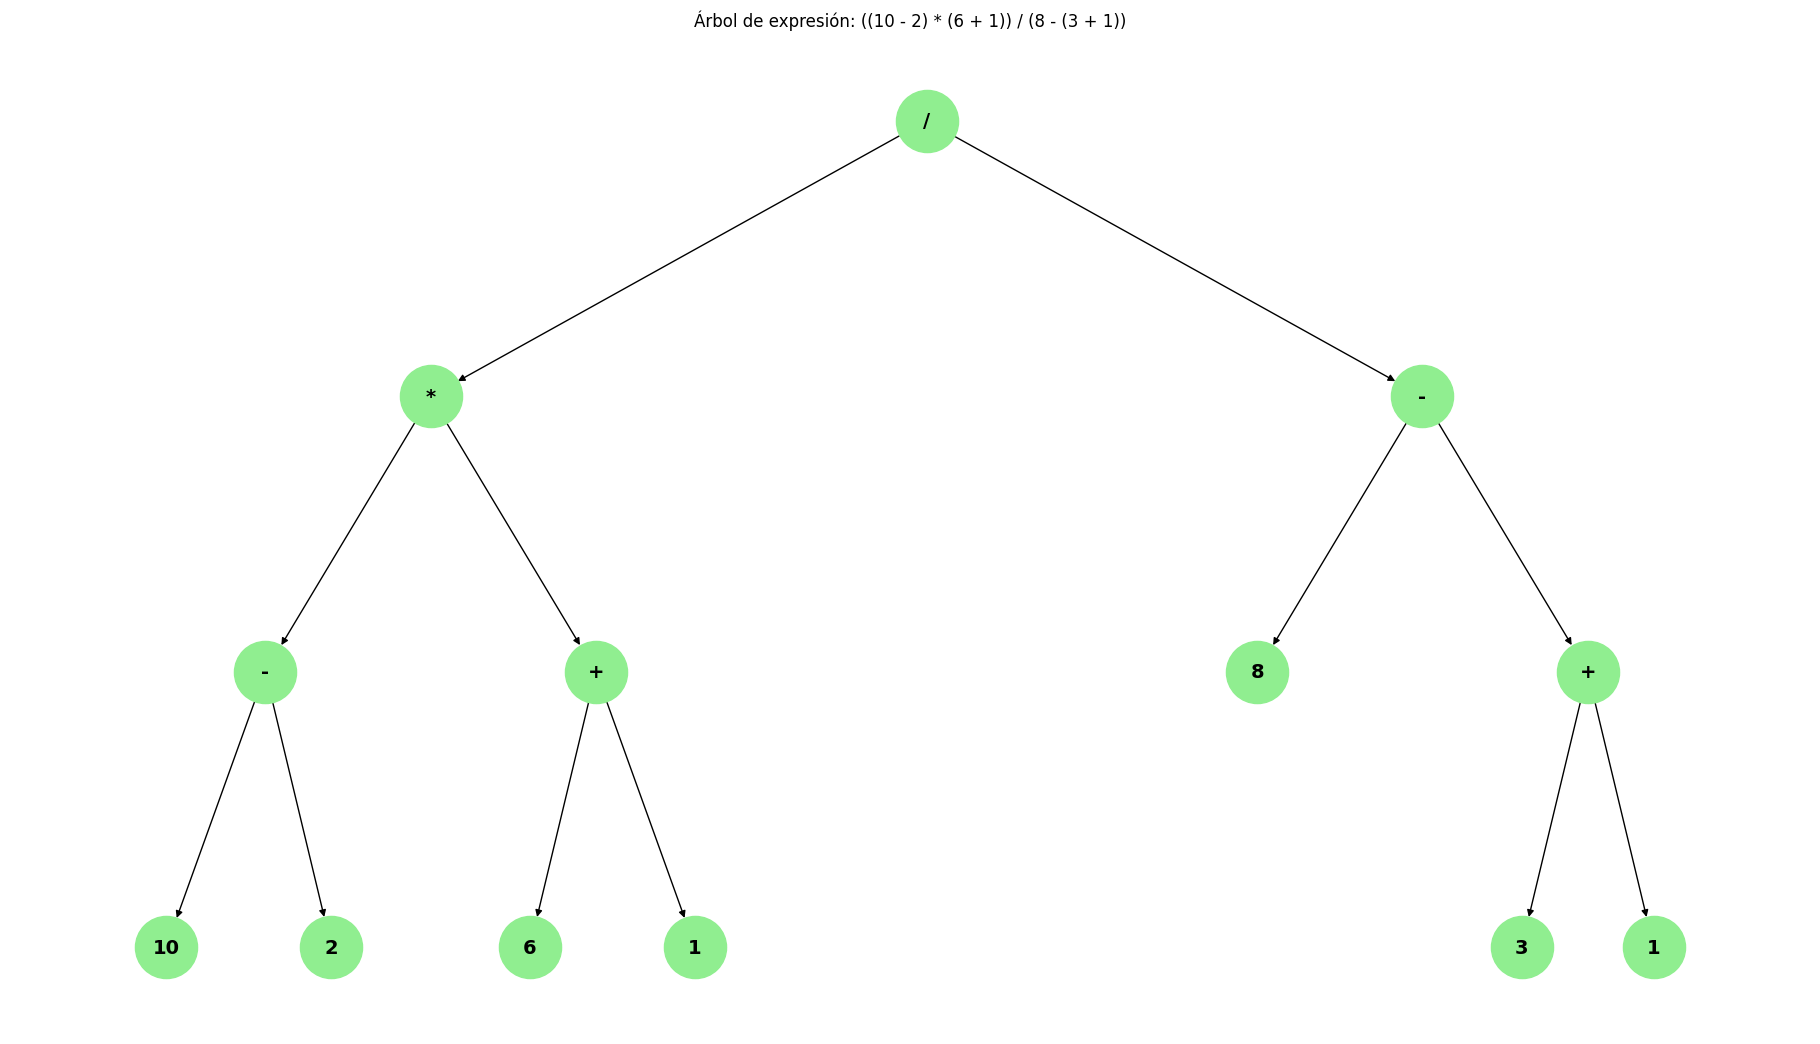

In [656]:
# Crear la figura y graficar el árbol
plt.figure(figsize=(18, 10))
nx.draw(
    G, pos,
    with_labels=True,
    labels=labels,
    node_color='lightgreen',
    node_size=2000,
    font_size=14,
    font_weight='bold',
    arrows=True
)

# Título del gráfico que describe la expresión
plt.title("Árbol de expresión: ((10 - 2) * (6 + 1)) / (8 - (3 + 1))")

# Ocultar ejes para una presentación más limpia
plt.axis('off')
plt.show()

### c. Evaluación de la Expresión

In [657]:
# Clase para representar un nodo del árbol binario de expresión
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

# Función que construye manualmente el árbol binario
def construir_arbol():
    raiz = Nodo('/')                        # Nodo raíz
    raiz.izq = Nodo('*')                    # Parte izquierda: multiplicación
    raiz.der = Nodo('-')                    # Parte derecha: resta

    raiz.izq.izq = Nodo('-')                # Multiplicación: 10 - 2
    raiz.izq.der = Nodo('+')                # y 6 + 1

    raiz.izq.izq.izq = Nodo(10)
    raiz.izq.izq.der = Nodo(2)

    raiz.izq.der.izq = Nodo(6)
    raiz.izq.der.der = Nodo(1)

    raiz.der.izq = Nodo(8)                  # Resta: 8 - (3 + 1)
    raiz.der.der = Nodo('+')
    raiz.der.der.izq = Nodo(3)
    raiz.der.der.der = Nodo(1)

    return raiz

# Función recursiva para evaluar el árbol
def evaluar(nodo):
    if isinstance(nodo.valor, int):         # Si el nodo es número, devolverlo
        return nodo.valor
    izq = evaluar(nodo.izq)                 # Evaluar hijo izquierdo
    der = evaluar(nodo.der)                 # Evaluar hijo derecho
    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Construcción del árbol y cálculo del resultado
arbol = construir_arbol()
resultado = evaluar(arbol)
print(resultado)  # Resultado esperado: ((10 - 2) * (6 + 1)) / (8 - (3 + 1)) = (8 * 7) / 4 = 56 / 4 = 14.0


14.0


## Ejercicio 5
**Expresión a resolver:** `(5 + (2 * (8 - 3))) / (6 - (1 + 2))`

### a. Construcción del Árbol

In [658]:
# Importamos librerías para graficar el árbol
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()  # Árbol dirigido (expresión binaria)

# Aristas que representan la jerarquía de operaciones
edges = [
    ('/', '+.1'),        # Raíz '/' conecta con suma y resta
    ('/', '-.1'),

    ('+.1', '5'),        # Suma conecta con operando 5 y multiplicación
    ('+.1', '*'),

    ('*', '2.a'),        # Multiplicación conecta con 2 y (8 - 3)
    ('*', '-.2'),

    ('-.2', '8'),        # Subárbol izquierdo: 8 - 3
    ('-.2', '3'),

    ('-.1', '6'),        # Parte derecha de la división: 6 - (1 + 2)
    ('-.1', '+.2'),
    
    ('+.2', '1'),        # Subárbol derecho: 1 + 2
    ('+.2', '2.b'),
]

G.add_edges_from(edges)

# Posiciones para graficar los nodos
pos = {
    '/': (0, 2),          # Nodo raíz (nivel superior)
    '+.1': (-1.5, 1),     # Hijo izquierdo de '/'
    '-.1': (1.5, 1),      # Hijo derecho de '/'

    '5': (-2, 0),         # Hijo izquierdo de '+.1'
    '*': (-1, 0),         # Hijo derecho de '+.1'

    '2.a': (-1.5, -1),    # Hijo izquierdo de '*'
    '-.2': (-0.5, -1),    # Hijo derecho de '*'

    '8': (-1, -2),        # Hijo izquierdo de '-.2'
    '3': (0, -2),         # Hijo derecho de '-.2'

    '6': (1, 0),          # Hijo izquierdo de '-.1'
    '+.2': (2, 0),        # Hijo derecho de '-.1'

    '1': (1.5, -1),       # Hijo izquierdo de '+.2'
    '2.b': (2.5, -1),     # Hijo derecho de '+.2'
}


# Etiquetas limpias para los nodos
labels = {
    '/': '/',
    '+.1': '+',
    '+.2': '+',
    '-.1': '-',
    '-.2': '-',
    '*': '*',
    '5': '5',
    '8': '8',
    '3': '3',
    '6': '6',
    '1': '1',
    '2.a': '2',
    '2.b': '2',
}


### b. Visualización con `networkx`

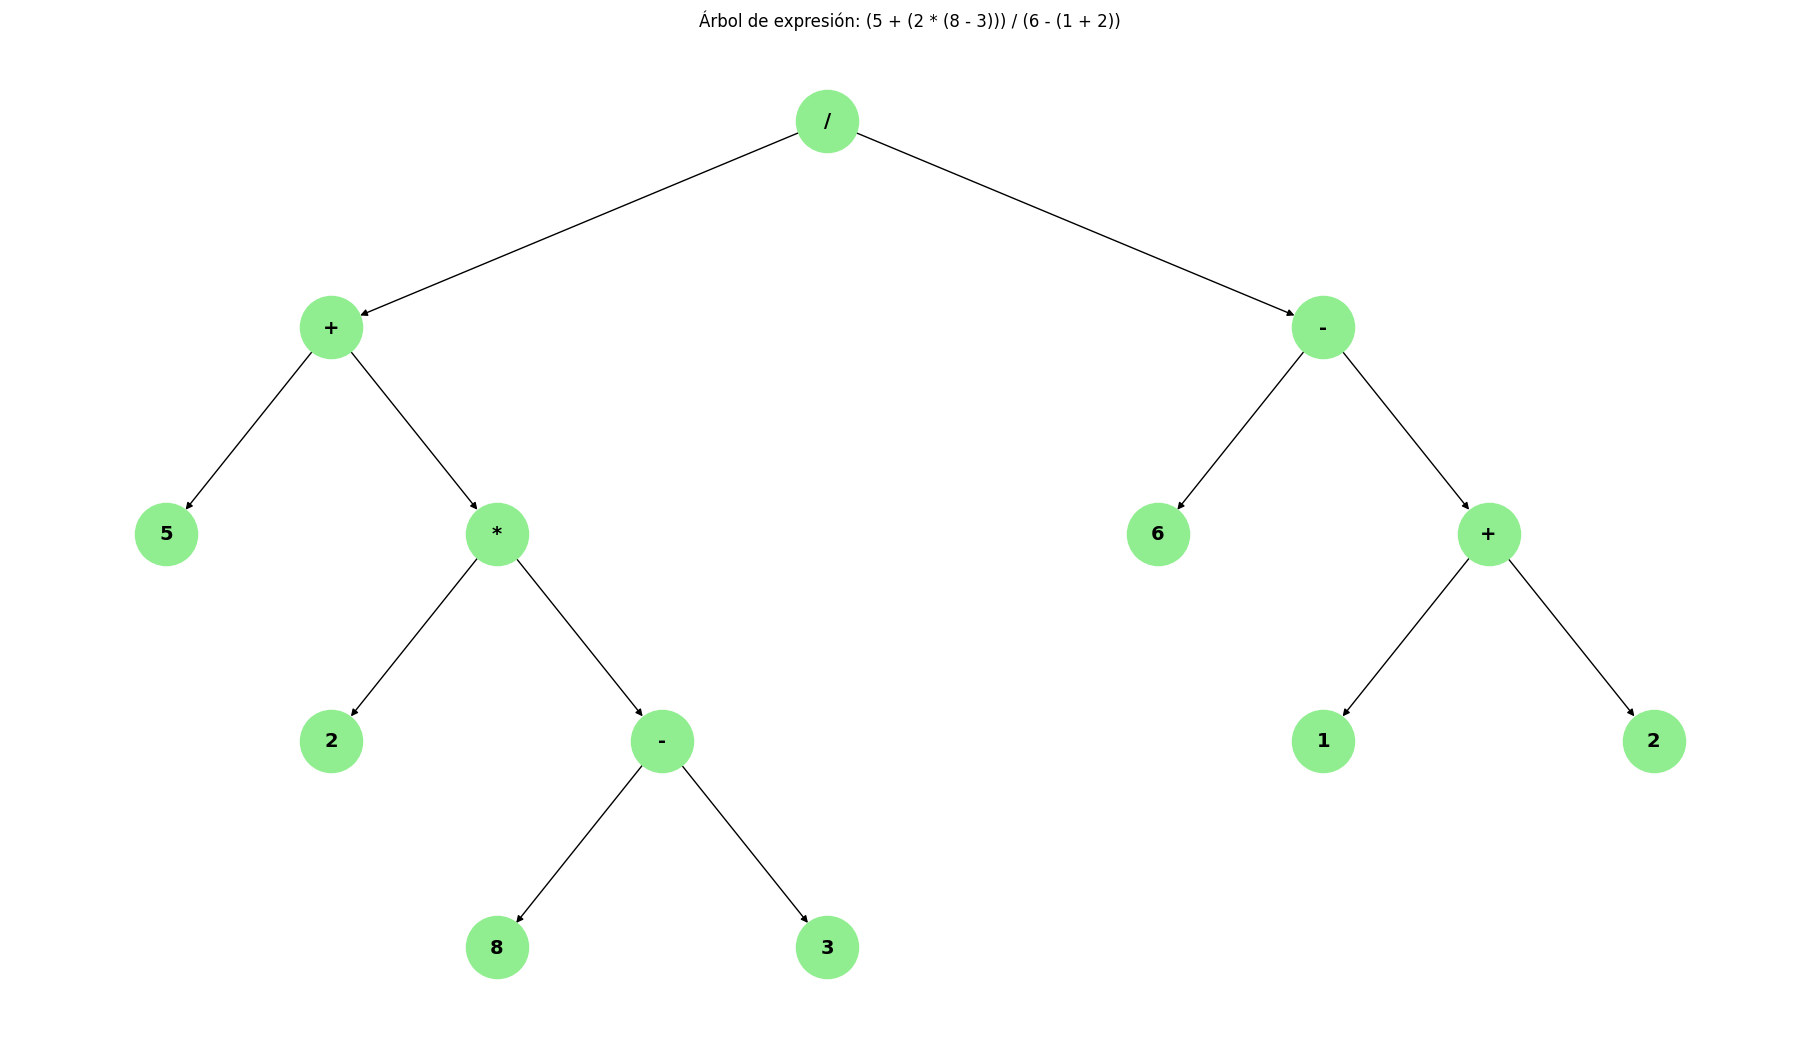

In [659]:
plt.figure(figsize=(18, 10))  # Tamaño del gráfico

# Dibujar el árbol
nx.draw(
    G, pos,
    with_labels=True,
    labels=labels,
    node_color='lightgreen',
    node_size=2000,
    font_size=14,
    font_weight='bold',
    arrows=True
)

# Título del gráfico
plt.title("Árbol de expresión: (5 + (2 * (8 - 3))) / (6 - (1 + 2))")
plt.axis('off')  # Ocultar ejes
plt.show()

### c. Evaluación de la Expresión

In [660]:
# Definición del nodo para árbol binario
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

# Construcción manual del árbol
def construir_arbol():
    raiz = Nodo('/')                      # División principal
    raiz.izq = Nodo('+')                  # Parte izquierda: 5 + (2 * (8 - 3))
    raiz.der = Nodo('-')                  # Parte derecha: 6 - (1 + 2)

    raiz.izq.izq = Nodo(5)
    raiz.izq.der = Nodo('*')
    raiz.izq.der.izq = Nodo(2)
    raiz.izq.der.der = Nodo('-')
    raiz.izq.der.der.izq = Nodo(8)
    raiz.izq.der.der.der = Nodo(3)

    raiz.der.izq = Nodo(6)
    raiz.der.der = Nodo('+')
    raiz.der.der.izq = Nodo(1)
    raiz.der.der.der = Nodo(2)

    return raiz

# Función recursiva para evaluar la expresión
def evaluar(nodo):
    if isinstance(nodo.valor, int):
        return nodo.valor
    izq = evaluar(nodo.izq)
    der = evaluar(nodo.der)
    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Construcción y evaluación
arbol = construir_arbol()
resultado = evaluar(arbol)
print(resultado)  # Resultado esperado: (5 + (2 * (8 - 3))) / (6 - (1 + 2)) = (5 + 10) / 3 = 15 / 3 = 5.0


5.0


## Rúbrica de Evaluación (General - 100 puntos)


| Criterio                                                                                      | Puntaje Máximo |
|-----------------------------------------------------------------------------------------------|----------------|
| **1. Construcción correcta del árbol binario de expresión**                                  | **25 pts**     |
| - Jerarquía de operadores, operandos como hojas                                              |                |
|                                                                                               |                |
| **2. Implementación en Python con POO y recursividad**                                       | **25 pts**     |
| - Uso adecuado de clases y funciones recursivas                                              |                |
|                                                                                               |                |
| **3. Visualización clara con `networkx` y `matplotlib`**                                     | **20 pts**     |
| - Jerarquía y distribución clara de nodos                                                    |                |
|                                                                                               |                |
| **4. Evaluación correcta de la expresión aritmética**                                        | **20 pts**     |
| - Cálculo correcto del resultado                                                             |                |
|                                                                                               |                |
| **5. Claridad del código, organización y presentación del cuaderno**                         | **10 pts**     |
| - Comentarios, títulos y buena organización                                                  |                |
|                                                                                               |                |
| **Total**                                                                                     | **100 pts**    |
